In [31]:
import math
import numpy as np

In [32]:
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

In [105]:
# Set parameters.
Ms = 50.0 # weight of rocket shell (kg)
g = 9.81 # acceleration due to gravity (m.s^{-2})
rho = 1.091 # Average air density (kg.m^{-3})
r = 0.5 # radius (m)
A = math.pi * r**2 # Maximum cross sectional area of the rocket (m^2)
ve = 325 # exhaust speed (m.s^{-1})
CD = 0.15 # drag coefficient

# Set initial conditions.
Mpo = 100.0 # initial weight of the rocket propellant (kg)
Mp_dot = 0.0 # burning rate at t=0
v0 = 0.0 # intial velocity
h0 = 0.0 # initial height

In [106]:
def rhs_rocket(u, g, ve, A, CD, rho, Mp_dot, Ms):
    h, v, Mp = u
    rhs = np.array([v,
                    -g + Mp_dot * ve / (Ms + Mp) - 0.5 * rho * v**2 * A * CD / (Ms + Mp),
                    -Mp_dot])
    return rhs

In [107]:
def euler_step(u, f, dt, *args):
    u_new = u + dt * f(u, *args)
    return u_new

In [200]:
T = 28.2  # length of the time interval
dt = 0.1  # time-step size
N = int(T / dt) + 1  # number of time steps
t = np.linspace(0.0, T, num=N)

# Burning rate for first 5 seconds.
Mp_dot = 20.0

# Create array to store the solution at each time step.
u = np.empty((N, 3))

# Set the initial conditions.
u[0] = np.array([h0, v0, Mpo])

# Time integration using Euler's method.
for n in range(N - 1):
    if n > 49:
        Mp_dot = 0.0
    u[n + 1] = euler_step(u[n], rhs_rocket, dt, g, ve, A, CD, rho, Mp_dot, Ms)

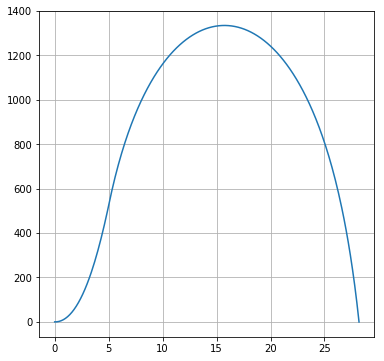

In [202]:
plt.figure(figsize=(6.0, 6.0))
plt.grid()
plt.plot(t, u[:,0])

In [225]:
# Time at which rocket hits the ground
np.where(u[:,0] <= 0)[0][2]

282

In [177]:
# Maximum velocity achieved
np.max(u[:,1])

232.1061334126179

In [178]:
# Maximum altitude
u[157,0]

1334.1829454303067

In [179]:
# Time at which rocket reaches maximum altitude
tmax = 157 * 0.1
tmax

15.700000000000001